# Titanic Survival data analysis

Data used: Kaggle titanic dataset

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('data/titanic_train.csv')

# preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


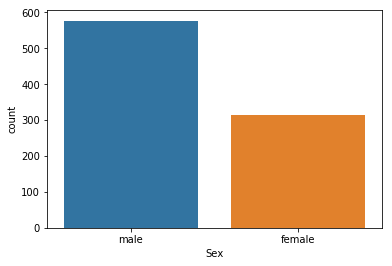

In [4]:
# Gender check
sns.countplot(x='Sex', data=titanic_df)

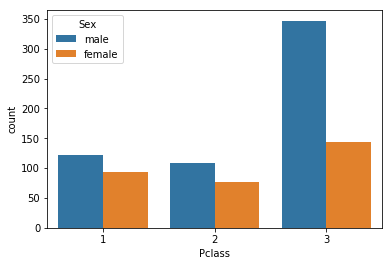

In [5]:
#Checking gender ratio for each class 
sns.countplot(x='Pclass', hue='Sex', data=titanic_df)

In [6]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

    
def age_range(passenger):
# Take the Age and Sex
    age = passenger['Age']
    # Compare the age, otherwise leave the sex
    if age <= 10:
        return 'child'
    elif age > 10 and age <=17:
        return 'teen'
    elif age > 17 and age <=30:
        return 'younge adults'
    elif age > 30 and age <=55:
        return 'middle aged'
    elif age > 55:
        return "old aged"


titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

titanic_df['age_band'] = titanic_df[['Age']].apply(age_range,axis=1)

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,younge adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,middle aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,younge adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,middle aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,middle aged


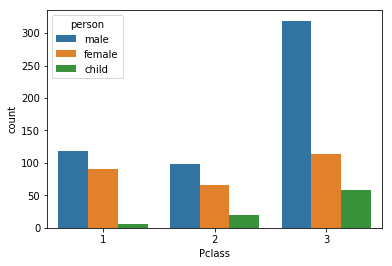

In [8]:
sns.countplot(x='Pclass', hue='person', data=titanic_df)

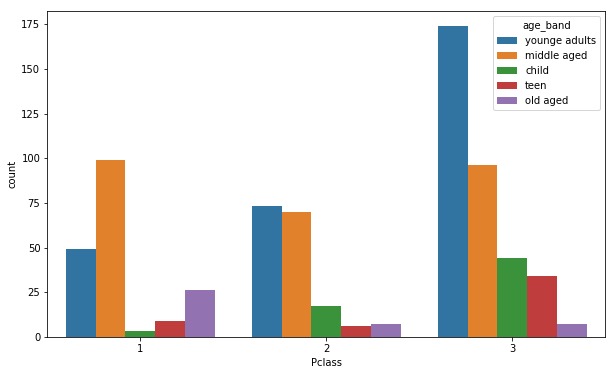

In [9]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Pclass', hue='age_band', data=titanic_df)

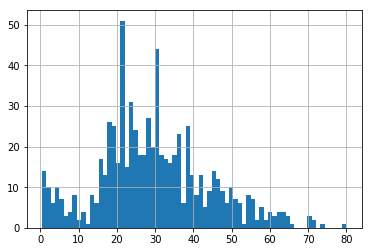

In [10]:
titanic_df['Age'].hist(bins=70)

In [11]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [12]:
titanic_df['age_band'].value_counts()

younge adults    296
middle aged      265
child             64
teen              49
old aged          40
Name: age_band, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


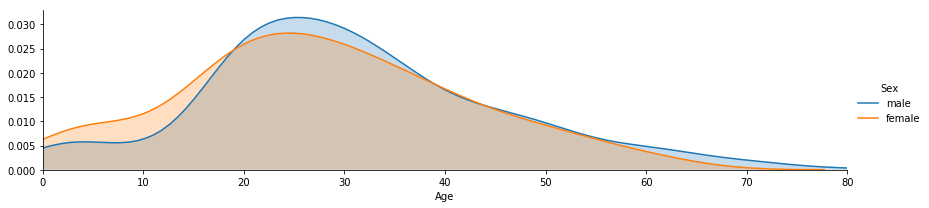

In [13]:
# 
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

fig.map(sns.kdeplot,('Age'),shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

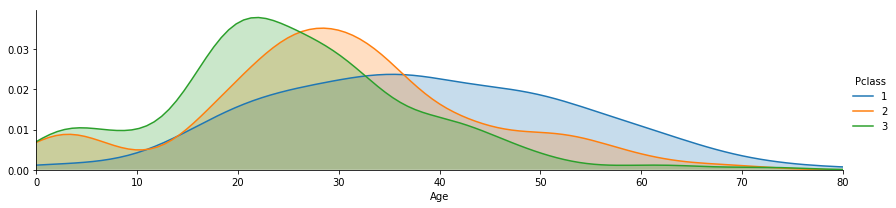

In [14]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)

fig.map(sns.kdeplot,('Age'),shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

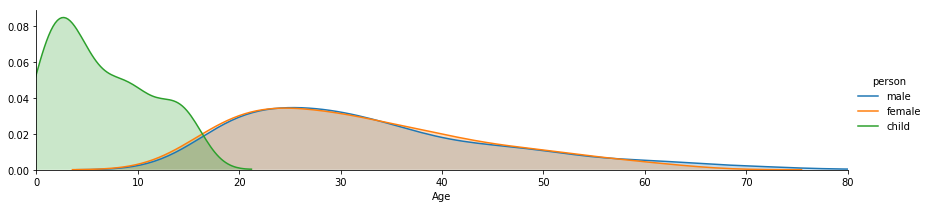

In [15]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)

fig.map(sns.kdeplot,('Age'),shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

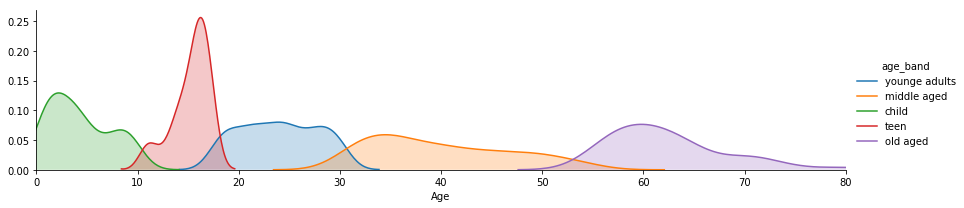

In [16]:
fig = sns.FacetGrid(titanic_df, hue="age_band",aspect=4)

fig.map(sns.kdeplot,('Age'),shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Relationship between Deck and passenger class.

In [17]:
deck = titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

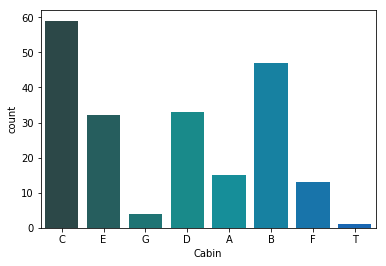

In [19]:
levels = []

for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

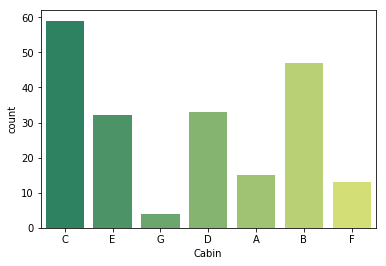

In [20]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot('Cabin',data=cabin_df,palette='summer')

Where did the passengers come from?

Embarked column has C,Q,and S values and these stand for Cherbourg, Queenstown, Southhampton.

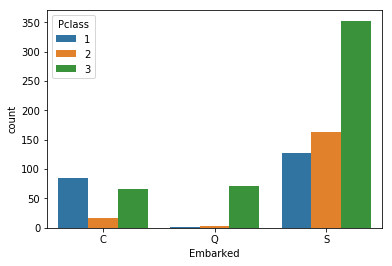

In [21]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

Are the passengers alone or with family? 

In [23]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,age_band,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,younge adults,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,middle aged,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,younge adults,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,middle aged,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,middle aged,Alone


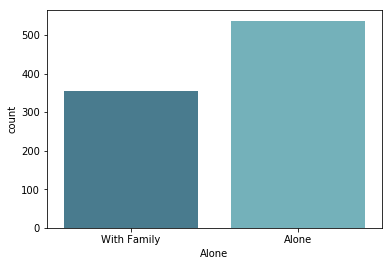

In [25]:
sns.countplot('Alone',data=titanic_df,palette="GnBu_d")

Factors helped in passenger survival

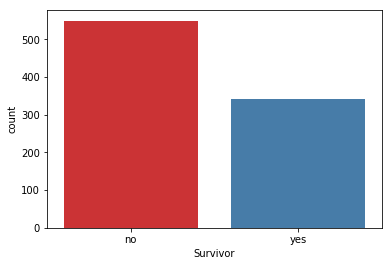

In [26]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

sns.countplot('Survivor',data=titanic_df,palette='Set1')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


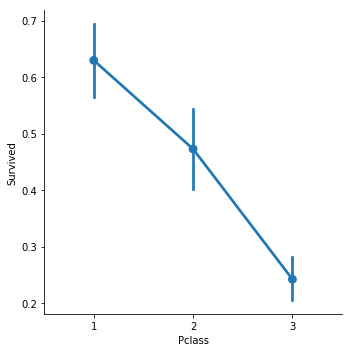

In [27]:
sns.catplot('Pclass','Survived', kind='point', data=titanic_df)

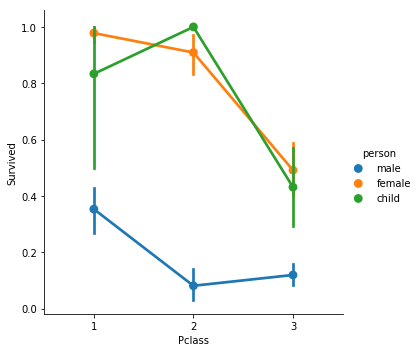

In [28]:
sns.catplot('Pclass','Survived',hue='person', kind='point', data=titanic_df)

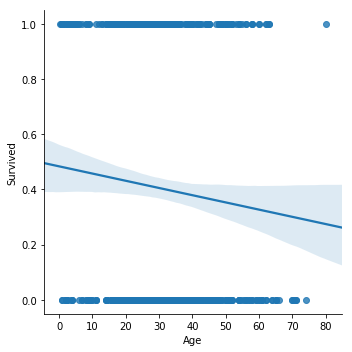

In [29]:
sns.lmplot('Age','Survived',data=titanic_df)

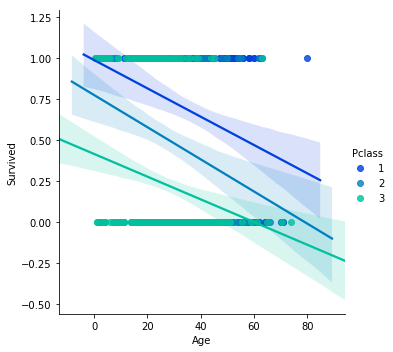

In [30]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

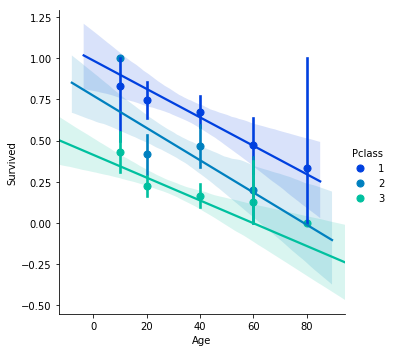

In [31]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

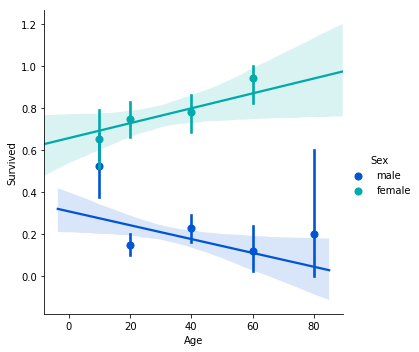

In [32]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Did the deck have an effect on the passengers survival rate?